In [39]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

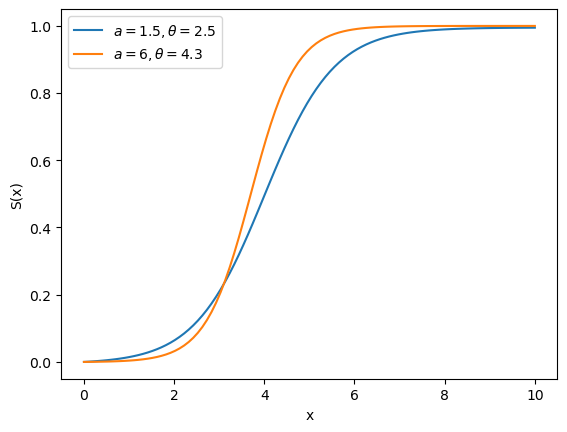

In [40]:
# First set of parameters (following Wilson-Cowan paper), 3 fixed points, 2 stable, 1 unstable
"""
c1 = 12
c2 = 4
c3 = 13
c4 = 11
ri = 1
re = 1
ae = 1.2
the = 2.8
ai = 1
thi = 4
P = 0
Q = 0
"""
# Second set of parameters, 3 stable (among which 1 limit cycle, apparently eventually converging), 2 unstable
"""
c1 = 13
c2 = 4
c3 = 22
c4 = 2
ri = 1
re = 1
ae = 1.5
the = 2.5
ai = 6
thi = 4.3
P = 0
Q = 0


# Third set of parameters, 1 unstable fixed point (limit cycle)
"""
c1 = 16
c2 = 12
c3 = 15
c4 = 3
ri = 1
re = 1
ae = 1.3
the = 4
ai = 2
thi = 3.7
P = 1.25
Q = 0

# Defining the base sigmoid function, then the down-shifted versions of the E and I populations
def Sig(x, a, th):
    return (1 + np.exp(-a * (x - th)))**(-1)

def Se(x):
    return Sig(x, ae, the) - Sig(0, ae, the)

def Si(x):
    return Sig(x, ai, thi) - Sig(0, ai, thi)

# Simple test displaying sigmoids
x = np.linspace(0, 10, 100)
se = Se(x)
si = Si(x)
plt.plot(x, se, label=r'$a = 1.5, \theta = 2.5$')
plt.plot(x, si, label=r'$a = 6, \theta = 4.3$')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.legend()

C:\Users\livio\AppData\Local\Temp\ipykernel_6236\1839530379.py:3: RuntimeWarning: invalid value encountered in log
  return (-1 / a) * np.log((x + (1 + np.exp(a * th))**(-1))**(-1) - 1) + th


"\n# Plotting vlines on top of the isoclines to extend the I nullcline, in order to visualise the 5 intersections (second set of parameters)\n#plt.vlines(0, -0.05, 0.14, color='orange')\n#plt.vlines(0.5, 0.285, 0.51, color='orange')\nplt.show()\n\n"

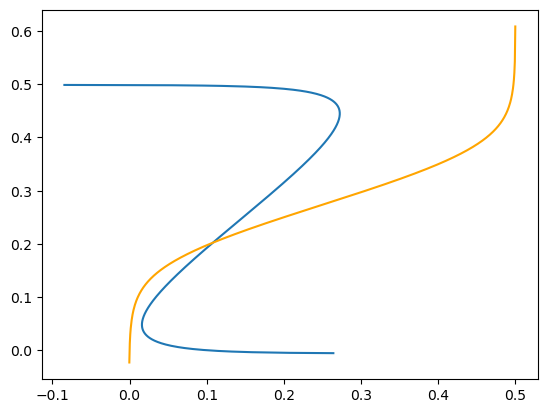

In [41]:

# Inverse sigmoid for nullclines
def Sig_inv(x, a, th):
    return (-1 / a) * np.log((x + (1 + np.exp(a * th))**(-1))**(-1) - 1) + th

# Not WC as in Water Closet, defining base function that calculates the step (dE/dt and dI/dt), 
# to be used in odeint()
def WC(v, t): 
    E, I = v
    dE = -E + (1 - re * E) * Se(c1 * E - c2 * I + P)
    dI = -I + (1 - ri * I) * Si(c3 * E - c4 * I + Q)
    return [dE, dI]

# Isocline functions
def E_iso(E, Pv):
    return (1 / c2) * (c1 * E - Sig_inv(E / (1 - re * E), ae, the) + Pv)
    
def I_iso(I):
    return (1 / c3) * (c4 * I + Sig_inv(I / (1 - ri * I), ai, thi) - Q)

En = np.linspace(-0.6, 0.6, 2000)
In = np.linspace(-0.6, 0.6, 2000)

Eiso = E_iso(En, P)
Iiso = I_iso(In)


plt.plot(Eiso, In)
plt.plot(En, Iiso, color='orange')
"""
# Plotting vlines on top of the isoclines to extend the I nullcline, 
# in order to visualise the 5 intersections (second set of parameters)

#plt.vlines(0, -0.05, 0.14, color='orange')
#plt.vlines(0.5, 0.285, 0.51, color='orange')
plt.show()

"""

In [42]:
# Base variables (inputs) for defining the vector field
x1 = np.linspace(-0.1, 0.6, 60)
x2 = np.linspace(-0.1, 0.6, 60)
# Grid creation
x1, x2 = np.meshgrid(x1, x2)
# Defining the vectors that give the vector field
X1, X2 = WC([x1, x2], 0)

In [47]:
f_p = []
# Since x1 and x2 form a grid for all combinations of their values, 
# we (un)ravel them in order to consider all combinations
y1 = x1.ravel()
y2 = x2.ravel()
for i in range(3600):
    # We try to find a solution for the intersection(s) of the two nullclines
    solution, inf, ier, message = fsolve(WC, [y1[i], y2[i]], args=(0), full_output=1)
    if ier == 1: # ier = 1 if we manage to find a solution
        f_p.append(solution)

f_p = np.transpose(np.array(f_p))
f_p

C:\Users\livio\AppData\Local\Temp\ipykernel_6236\371052206.py:49: RuntimeWarning: overflow encountered in exp
  return (1 + np.exp(-a * (x - th)))**(-1)


array([[0.20236506, 0.20236506, 0.20236506, ..., 0.20236506, 0.20236506,
        0.20236506],
       [0.10797193, 0.10797193, 0.10797193, ..., 0.10797193, 0.10797193,
        0.10797193]])

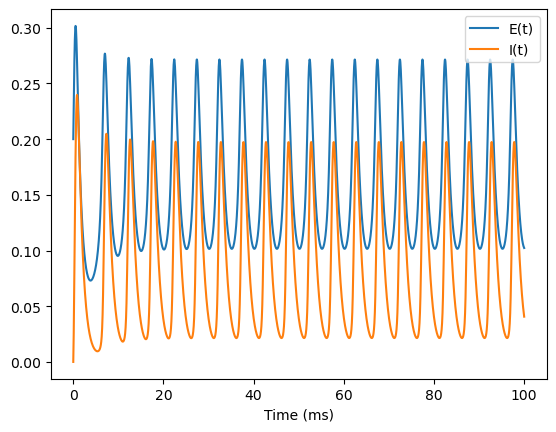

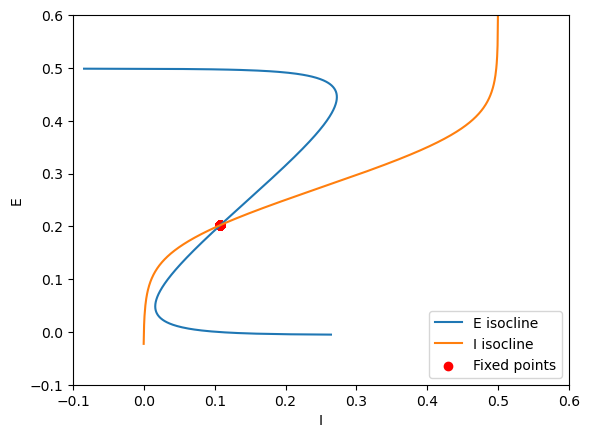

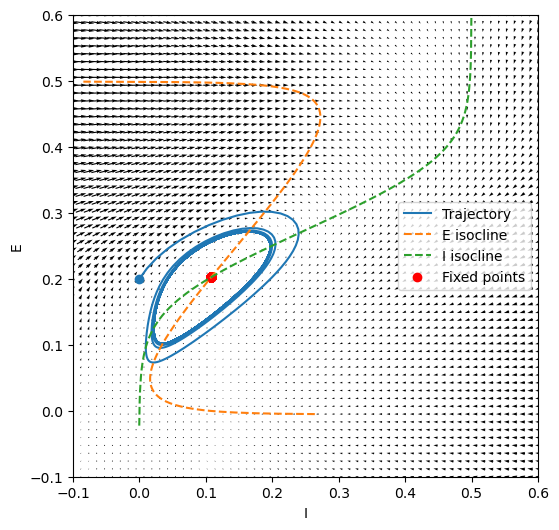

In [51]:
v_0 = [0.2, 0.0] # Initial conditions (E, I)
tm = np.linspace(0, 100, 2000) # Time

vl = odeint(WC, v_0, tm) # Solving ODEs for given time interval
# Assigning results to specific variables
E = vl[:, 0] 
I = vl[:, 1]

# Plotting everything now

plt.plot(tm, E, label='E(t)')
plt.plot(tm, I, label='I(t)')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()

#plt.plot(I, E, label='Trajectory')
plt.plot(Eiso, In, label='E isocline')
plt.plot(En, Iiso, label='I isocline')
plt.scatter(f_p[1], f_p[0], marker='o', color='red', label="Fixed points")
plt.xlabel('I')
plt.ylabel('E')
plt.xlim(-0.1, 0.6)
plt.ylim(-0.1, 0.6)
plt.legend()

# Here plotting vector field, nullclines, fixed point(s) and a trajectory given initial conditions

plt.figure(figsize=(6, 6))
plt.quiver(x2, x1, X2, X1, pivot='middle')
plt.plot(I, E, label='Trajectory')
plt.scatter(v_0[1], v_0[0])
plt.plot(Eiso, In, ls='dashed', label='E isocline')
plt.plot(En, Iiso, ls='dashed', label='I isocline')

"""
# Optional to show other trajectories, with random initial conditions
ci = np.random.uniform(0, 0.5, (15, 2))
for i in ci[1:]:
    vlt = odeint(WC, i, tm)
    Et = vlt[:, 0]
    It = vlt[:, 1]
    plt.scatter(i[1], i[0], color='purple')
    plt.plot(It, Et, color='purple')
  
vlt = odeint(WC, ci[0], tm)
Et = vlt[:, 0]
It = vlt[:, 1]
plt.plot(It,  Et, color='purple', label='Test trajectories')
"""  
plt.xlim(-0.1, 0.6)
plt.ylim(-0.1, 0.6)
plt.xlabel('I')
plt.ylabel('E')
plt.scatter(f_p[1], f_p[0], marker='o', color='red', label="Fixed points")
plt.legend(loc='center right')